# **Introduction**

Carbon Dioxide (CO<sub>2</sub>) and Greenhouse Gas (GHG) emissions as a result of human activities have been demonstrated to be the primary driver of today's climate change. Supporting evidence of this is the fact that global average temperatures have increased by more than 1 °C since pre-industrual times.

A changing climate has a range of potential ecological, physical, and health impacts, including extreme weather events (such as floods, droughts, storms, and heatwaves); sea-level rise; altered crop growth; and disrupted water systems (*5th. Intergovernmental Panel on Climate Change (IPCC) report.*<sup>1</sup>).

Therefore, to keep track and monitor the CO<sub>2</sub> and GHG concentrations in the atmosphere, has become a matter of ensuring the all Earth's future life existence.

### **Main Objective:** 

The main purpose of this project is to apply simple Python processing and visualization techniques, and perform Exploratory Data Analysis on a CO<sub>2</sub> emissions data in order to obtain valuable insights on a significant worldwide issue.

## **About the dataset**

This dataset was obtained from a public GitHub repository of [Our World In Data](https://github.com/owid/co2-data), a non-governmental organization (NGO) which aims to provide a wide range of insights and relevant information regarding several world problems.

A detailed description of every single feature of the dataset can be read in the "`data/owid-co2-codebook.xlsx`" file.

## **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
import urllib.request
import upsetplot

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

# Magic function to display matplotlib figures in a jupyter notebook
%matplotlib inline

# Making plots pretty
sns.set_style("darkgrid")

## **Reading the data**

In [ ]:
# Data set url
owid_co2_data_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
owid_co2_codebook_url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-codebook.csv"

In [ ]:
# Downloading data from url into ./data/ directory
urllib.request.urlretrieve(
    url = owid_co2_data_url,
    filename = "./data/owid-co2-data.csv"
)

In [ ]:
# Downloading codebook from url into ./data/ directory
urllib.request.urlretrieve(
    url = owid_co2_codebook_url,
    filename = "./data/owid-co2-codebook.csv"
)

In [ ]:
# Converting codebook csv file into excel file and saving it into ./data/ directory
codebook_df = pd.read_csv("./data/owid-co2-codebook.csv")
codebook_excel = pd.ExcelWriter("./data/owid-co2-codebook.xlsx")
codebook_df.to_excel(codebook_excel, index=False)
codebook_excel.save()

In [2]:
# To specify the number of rows and columns to be displayed by pandas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [21]:
# Reading and visualizing the first 5 rows of the CO2 data set
missing_values = [0, -0.000]
data = pd.read_csv("./data/owid-co2-data.csv", na_values=missing_values)

data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,co2_including_luc_growth_prct,co2_including_luc_per_capita,co2_including_luc_per_gdp,co2_including_luc_per_unit_energy,co2_per_capita,co2_per_gdp,co2_per_unit_energy,coal_co2,coal_co2_per_capita,consumption_co2,consumption_co2_per_capita,consumption_co2_per_gdp,cumulative_cement_co2,cumulative_co2,cumulative_co2_including_luc,cumulative_coal_co2,cumulative_flaring_co2,cumulative_gas_co2,cumulative_luc_co2,cumulative_oil_co2,cumulative_other_co2,energy_per_capita,energy_per_gdp,flaring_co2,flaring_co2_per_capita,gas_co2,gas_co2_per_capita,ghg_excluding_lucf_per_capita,ghg_per_capita,land_use_change_co2,land_use_change_co2_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,oil_co2,oil_co2_per_capita,other_co2_per_capita,other_industry_co2,primary_energy_consumption,share_global_cement_co2,share_global_co2,share_global_co2_including_luc,share_global_coal_co2,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_co2_including_luc,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_luc_co2,share_global_cumulative_oil_co2,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.931,0.781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.968,0.787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.119,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.968,0.784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.004,0.789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.004,0.785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117,NaN,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46523 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    46523 non-null  object 
 1   year                                       46523 non-null  int64  
 2   iso_code                                   39862 non-null  object 
 3   population                                 38574 non-null  float64
 4   gdp                                        14551 non-null  float64
 5   cement_co2                                 12872 non-null  float64
 6   cement_co2_per_capita                      12570 non-null  float64
 7   co2                                        26592 non-null  float64
 8   co2_growth_abs                             23330 non-null  float64
 9   co2_growth_prct                            23541 non-null  float64
 10  co2_including_luc     

Some data sets can have column names with different formats, such as upper cases, lower cases, spaces, symbols, etc. In this case, the column names have already been standardized, so there's no need to do that.

In [5]:
# Checking which features are different than float type
data.dtypes[data.dtypes != "float64"]

country     object
year         int64
iso_code    object
dtype: object

All the columns are float type objects except **`'country'`**, **`'year'`** and **`'iso_code'`** which are differents.

## **Using Pandas API extension for EDA**

### **Missing values analysis**

In [23]:
co2_df = data.copy()

In [24]:
%run pd-extensions.ipynb

In [25]:
# Total number of missing values in the dataset
total_missing = co2_df.explore.number_missing()
print(f"There are {total_missing} missing values in the dataset.")

There are 2264752 missing values in the dataset.


In [26]:
# Summary table of missing values per variable
co2_df.explore.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,country,0,46523,0.00
1,year,0,46523,0.00
2,iso_code,6661,46523,14.32
3,population,7949,46523,17.09
4,gdp,31972,46523,68.72
5,cement_co2,33651,46523,72.33
6,cement_co2_per_capita,33953,46523,72.98
7,co2,19931,46523,42.84
8,co2_growth_abs,23193,46523,49.85
9,co2_growth_prct,22982,46523,49.40


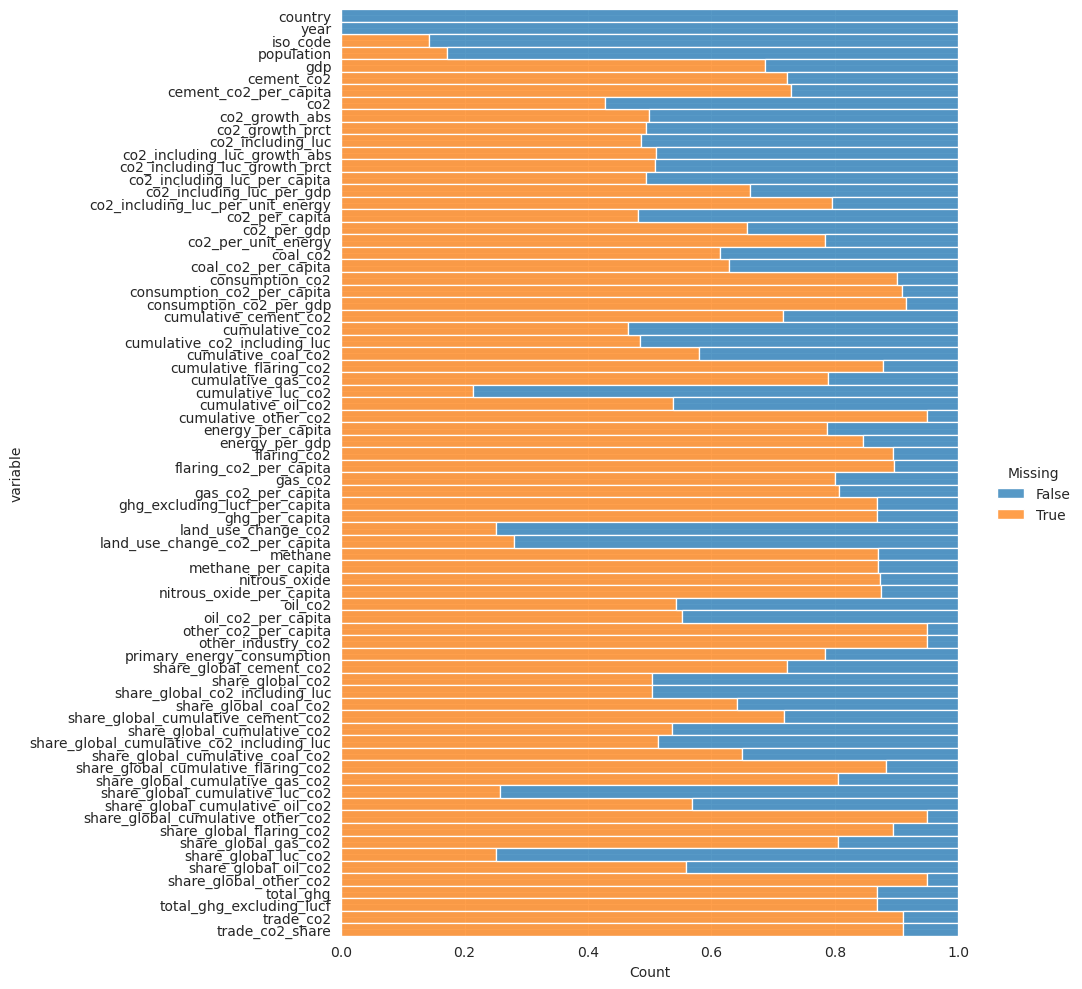

In [27]:
# Visualizing the proportion of missing values per variable
co2_df.explore.missing_variable_plot()

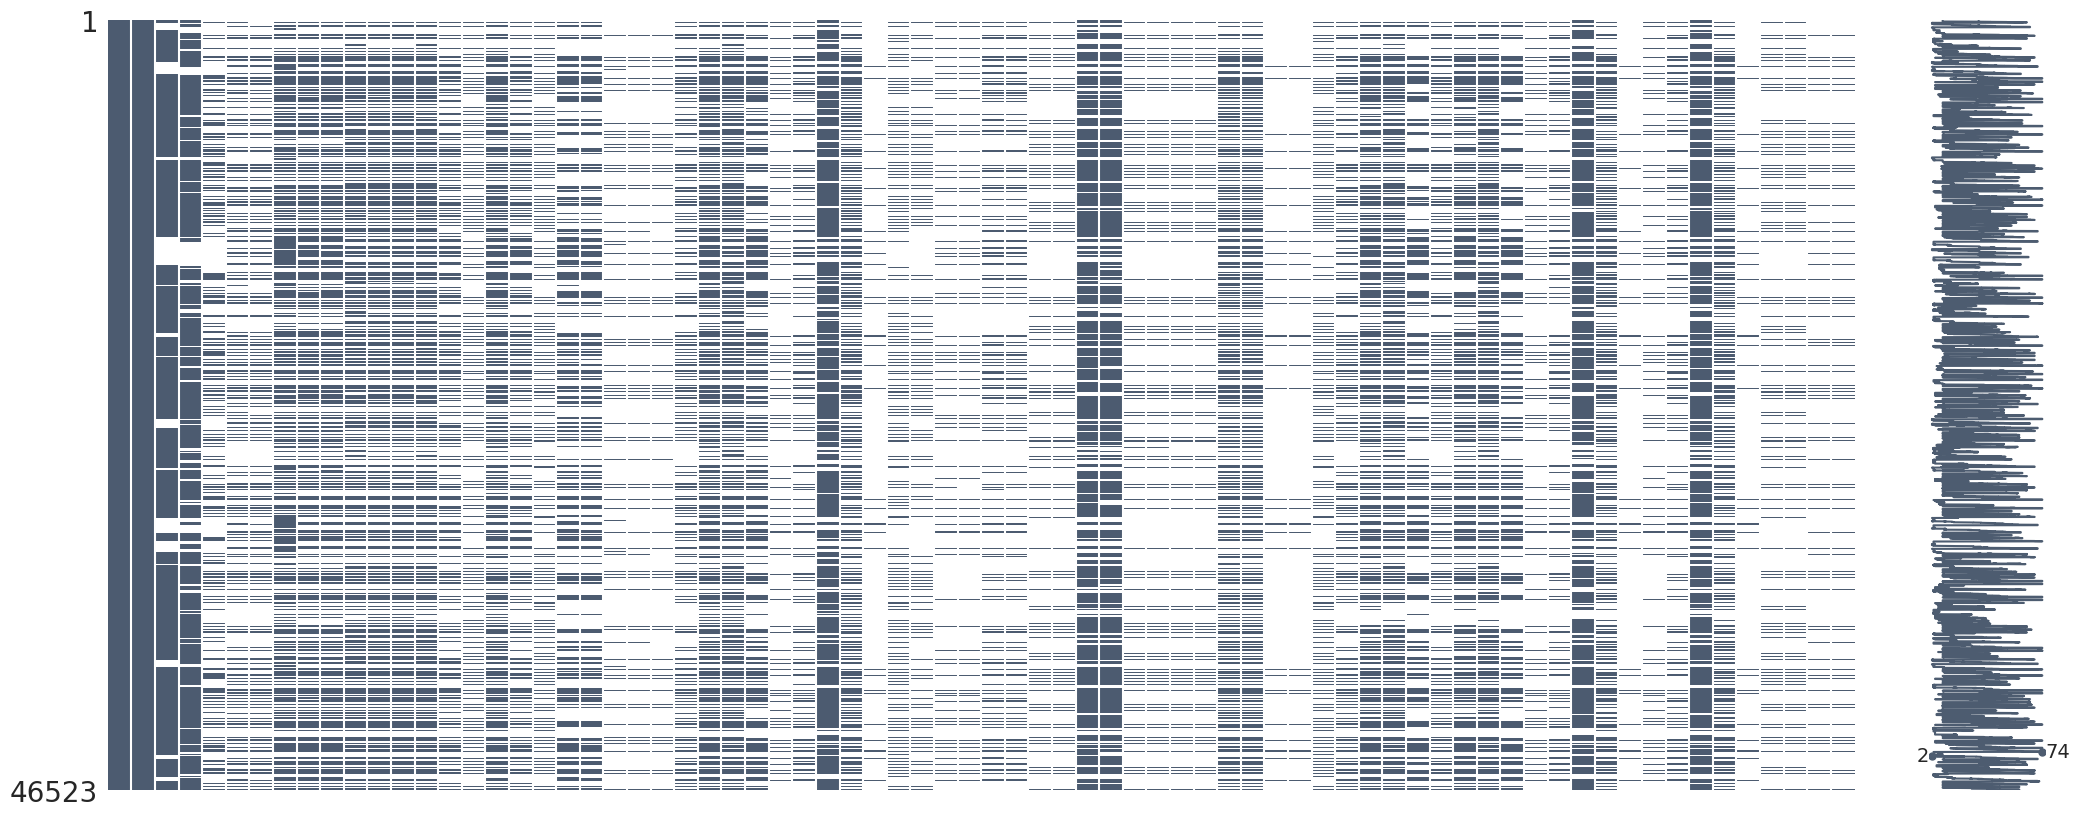

In [28]:
co2_df.explore.missing_variable_plot_matrix()

# **Data Pre-processing**

There are many columns practically empty. Hence, for the purposes of this project, some of those columns will be manually deleted since they don't provide much information.

As a standardized unit of measurement, CO<sub>2</sub> emissions are technically called '**emissions of equivalent CO<sub>2</sub>**'. This is because the measurement not only accounts for the emissions of Carbon Dioxide gas alone, but also for other gases such as **Methane (CH<sub>4</sub>)**, **Nitrous Oxide (N<sub>2</sub>O)** and several others. Since the scope of this project will not include an analysis of each type of gas, and being that there's not a significant amount of data for them, these columns will be deleted too.

In [29]:
columns_to_delete = [
    'co2_including_luc_growth_abs',
    'co2_including_luc_growth_prct',
    'co2_including_luc_per_capita',
    'co2_including_luc_per_gdp',
    'co2_including_luc_per_unit_energy',
    'consumption_co2',
    'consumption_co2_per_capita',
    'consumption_co2_per_gdp',
    'cumulative_co2_including_luc',
    'cumulative_luc_co2',
    'flaring_co2',
    'flaring_co2_per_capita',
    'ghg_excluding_lucf_per_capita',
    'ghg_per_capita',
    'methane',
    'methane_per_capita',
    'nitrous_oxide',
    'nitrous_oxide_per_capita',
    'share_global_co2_including_luc',
    'share_global_cumulative_cement_co2',
    'share_global_cumulative_co2',
    'share_global_cumulative_co2_including_luc',
    'share_global_cumulative_coal_co2',
    'share_global_cumulative_gas_co2',
    'share_global_cumulative_flaring_co2',
    'share_global_cumulative_luc_co2',
    'share_global_cumulative_other_co2',
    'share_global_cumulative_oil_co2',
    'share_global_luc_co2',
    'total_ghg',
    'total_ghg_excluding_lucf',
    'trade_co2',
    'trade_co2_share'
]

co2_df.drop(
    columns = columns_to_delete,
    axis = 1,
    inplace = True
)

### **Year column**

In [30]:
# Checking minimum and maximum year
print("min year:", co2_df["year"].min())
print("max year:", co2_df["year"].max())

min year: 1750
max year: 2021


In [31]:
np.sort(co2_df["year"].unique())

array([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
       1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
       1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
       1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
       1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
       1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
       1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
       1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
       1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
       1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859,
       1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870,
       1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881,
       1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892,
       1893, 1894, 1895, 1896, 1897, 1898, 1899, 19

The data registered dates back since the late 18th century, beginning of the Industrial Revolution.

In [ ]:
co2_df = co2_df[co2_df["year"] >= 1800]

In [32]:
# Checking missing values in the year column
co2_df["year"].isnull().sum()

0

No missing values in the year column.

### **ISO code column**

In [33]:
# Checking missing values in the ISO code column
co2_df["iso_code"].isnull().sum()

6661

In [34]:
# Checking countries without an ISO code
co2_df[co2_df["iso_code"].isnull()]["country"].unique()

array(['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Central America (GCP)', 'Europe',
       'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (27) (GCP)',
       'European Union (28)', 'French Equatorial Africa (GCP)',
       'French West Africa (GCP)', 'High-income countries',
       'International transport', 'Kosovo', 'Kuwaiti Oil Fires (GCP)',
       'Leeward Islands (GCP)', 'Low-income countries',
       'Lower-middle-income countries', 'Middle East (GCP)',
       'Non-OECD (GCP)', 'North America', 'North America (GCP)',
       'North America (excl. USA)', 'OECD (GCP)', 'Oceania',
       'Oceania (GCP)', 'Panama Canal Zone (GCP)', 'Ryukyu Islands (GCP)',
       'South America', 'South America (GCP)',
       'St. Kitts-Nevis-Anguilla (GCP)', 'Upper-middle-income countries',
       'World'], dtype=object)

In [35]:
non_iso_code_countries = [
    'Africa (GCP)',
    'Asia (GCP)',
    'Central America (GCP)',
    'Europe (GCP)',
    'Europe (excl. EU-27)',
    'Europe (excl. EU-28)',
    'European Union (27)',
    'European Union (27) (GCP)',
    'European Union (28)',
    'French Equatorial Africa (GCP)',
    'French West Africa (GCP)',
    'International transport',
    'Kosovo',
    'Kuwaiti Oil Fires (GCP)',
    'Leeward Islands (GCP)',
    'Middle East (GCP)',
    'Non-OECD (GCP)',
    'North America (GCP)',
    'OECD (GCP)',
    'Oceania (GCP)',
    'Panama Canal Zone (GCP)',
    'Ryukyu Islands (GCP)',
    'St. Kitts-Nevis-Anguilla (GCP)',
]

# for country in non_iso_code_countries:
#     co2 = co2_df[
#         (co2_df["country"] == country) & ~(co2_df["co2"].isnull())
#     ]["co2"].sum()
#     print(f"CO2 Emssions: {country} = {np.round(co2, 3)}")

In [ ]:
co2_df[co2_df["country"] == "Africa"][["country", "year", "co2"]].head()

In [ ]:
co2_df[co2_df["country"] == "Africa (GCP)"][["country", "year", "co2"]].head()

For the sake of simplification, the data of these countries won't be taken into consideration due to their relatively small contribution to global CO<sub>2</sub> emissions. Additionally, the data of '**European Union (27)**', '**European Union (28)**', and those continents/countries with the **(GCP)** suffix will also be deleted since their data has already been recorded in the continents/countries with no such suffix.

In [36]:
# Dropping the countries
for country in non_iso_code_countries:
    value = co2_df[
        co2_df["country"] == country
    ].index
    
    co2_df.drop(
        labels = value,
        axis = 0,
        inplace = True
    )

### **CO<sub>2</sub> Emissions column**

In [38]:
# Checking missing values in the co2 column
co2_df["co2"].isnull().sum()

19721

In [ ]:
# Dropping NaN's in co2 column
co2_df.drop(
    labels = co2_df[co2_df["co2"].isnull()].index,
    axis = 0,
    inplace = True
)

# Dropping NaN's in co2_per_capita column
co2_df.drop(
    labels = co2_df[co2_df["co2_per_capita"].isnull()].index,
    axis = 0,
    inplace = True
)

### **GDP column**

In [ ]:
# Filling GDP missing values for countries with co2 and co2_per_gdp entries.
co2_df["gdp"].fillna(
    co2_df["co2"] / co2_df["co2_per_gdp"],
    inplace = True
)

In [ ]:
co2_df.explore.missing_variable_plot()

In [ ]:
msno.matrix(
    co2_df,
    color = (0.3, 0.36, 0.44)
)

In [ ]:
# Analyzing the correlation of missing values
msno.dendrogram(df=co2_df)

The variables that are grouped near the base level indicate that their missing values are very correlated. The more separated the variables are, the less likely their missing values are correlated.

In [ ]:
co2_df[co2_df["cumulative_other_co2"].notnull()]["country"].unique()

In [ ]:
temp_df = co2_df[co2_df["country"] == "Asia"][["cumulative_other_co2", "year"]]
np.sort(temp_df[temp_df["cumulative_other_co2"].isnull()]["year"].unique())
# print(temp_df[temp_df["cumulative_other_co2"].isnull()]["year"].min())
# print(temp_df[temp_df["cumulative_other_co2"].isnull()]["year"].max())

In [ ]:
co2_df.to_csv("./data/processed_co2.csv")

# **Exploratory Data Analysis**

### **1. Yearly world CO2 emissions.**

In [ ]:
world_emissions = co2_df[co2_df["country"] == "World"][["year", "co2"]]

In [ ]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
    x = world_emissions["year"],
    y = world_emissions["co2"]
    )
)

fig.update_layout(
    title = "Yearly global CO2 emissions",
    xaxis_title = "Year",
    yaxis_title = "CO2 Emissions [Million metric-tons]"
)

fig.show()

### **2. CO2 emissions by continent.**

In [ ]:
emissions_by_continent = df[
    (df["country"] == "North America") |
    (df["country"] == "North America (excl. USA)") |
    (df["country"] == "South America") |
    (df["country"] == "Africa") |
    (df["country"] == "Europe") | 
    (df["country"] == "Asia") |
    (df["country"] == "Asia (excl. China & India)") |
    (df["country"] == "Oceania")
][
    df["year"] == 2020
][
    ["country", "co2"]
].sort_values(
    by = "co2",
    ascending = False
)

fig, axes = plt.subplots(
    nrows = 1,
    ncols = 2,
    figsize = (12, 6)
)

sns.barplot(
    emissions_by_continent,
    x = emissions_by_continent["country"],
    y = emissions_by_continent["co2"],
    ax = axes[0]
)

axes[0].set_xlabel(
    "Country",
    fontweight = "bold"
)

axes[0].set_xticklabels(
    labels = emissions_by_continent["country"],
    rotation = 90
)

axes[0].set_ylabel(
    "CO2 Emissions [1e6 metric-tons]",
    fontweight = "bold"
)

plt.pie(
    emissions_by_continent["co2"],
    labels = emissions_by_continent["country"],
    autopct = '%.0f%%',
    explode = (0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
)

fig.suptitle(
    'CO2 Emissions per continent [2020]',
    fontsize = 20,
    fontweight = "bold"
)

plt.tight_layout()
plt.show()

### **2. Yearly CO2 emissions by continent.**

In [ ]:
continent_yearly_emissions = df[
    (df["country"] == "North America") |
    (df["country"] == "North America (excl. USA)") |
    (df["country"] == "South America") |
    (df["country"] == "Africa") |
    (df["country"] == "Europe") | 
    (df["country"] == "Asia") |
    (df["country"] == "Asia (excl. China & India)") |
    (df["country"] == "Oceania")
][
    ["country", "year", "co2"]
]

sns.lineplot(
    data = continent_yearly_emissions,
    x = continent_yearly_emissions["year"],
    y = continent_yearly_emissions["co2"],
    hue = continent_yearly_emissions["country"]
)

plt.title(
    "Continent's Yearly CO2 emissions",
    fontweight = "bold",
    fontsize = 16
)

plt.xlabel("Year", weight = "bold")
plt.ylabel("CO2 Emissions [1e6 metric-tons]", weight = "bold")

plt.legend(bbox_to_anchor = (1.05, 1))

plt.show()

### **3. Top 10 countries with most CO2 emissions in 2020.**

In [ ]:
df_2 = df.copy()

# Removing non-iso countries
non_iso_countries = list(df_2[df_2["iso_code"].isnull()]["country"].unique())
for country in non_iso_countries:
    value = df_2[df_2["country"] == country].index
    df_2.drop(labels=value, axis=0, inplace=True)

In [ ]:
top_10_co2 = df_2[df_2["year"] == 2020][["country", "iso_code", "co2"]].sort_values(by="co2", ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_co2, x=top_10_co2["country"], y=top_10_co2["co2"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_co2["country"], rotation=90)
axes[0].set_ylabel("CO2 Emissions [1e6 metric-tons]", fontweight="bold")
plt.pie(top_10_co2["co2"], labels=top_10_co2["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_co2["country"], bbox_to_anchor=(1.05, 1))
fig.suptitle('Top 10 Countries With Most CO2 Emissions [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **3. Top 10 countries with most CO2 emissions per capita in 2020.**

In [ ]:
top_10_per_capita = df_2[df_2["year"] == 2020][["country", "co2_per_capita"]].sort_values(by="co2_per_capita", ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_per_capita, x=top_10_per_capita["country"], y=top_10_per_capita["co2_per_capita"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_per_capita["country"], rotation=90)
axes[0].set_ylabel("CO2 Emissions per capita [1e6 metric-tons]", fontweight="bold")
plt.pie(top_10_per_capita["co2_per_capita"], labels=top_10_per_capita["country"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
fig.suptitle('Top 10 Countries With Most CO2 Emissions per capita [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **4. Top 10 countries by Gross Domestic Product (GDP)**

In [ ]:
top_10_gdp = df_2[df_2["year"] == 2018][["country", "iso_code", "gdp"]].sort_values(by="gdp", ascending=False).head(10)
# GDP data has only been recorded until 2018

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_gdp, x=top_10_gdp["country"], y=top_10_gdp["gdp"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_gdp["country"], rotation=90)
axes[0].set_ylabel("GDP [Trillion USD]", fontweight="bold")
plt.pie(top_10_gdp["gdp"], labels=top_10_gdp["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_gdp["country"], bbox_to_anchor=(1.05, 1))
fig.suptitle('Top 10 countries by GDP [2018]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **5. Top 10 richest countries yearly CO2 emissions**

In [ ]:
top_10_co2_growth = df[df["country"].isin(list(top_10_gdp["country"]))][["country", "year", "iso_code", "gdp", "co2", "co2_growth_prct"]].sort_values(by="co2", ascending=False)

plt.figure(figsize=(10, 6))
sns.lineplot(data=top_10_co2_growth, x=top_10_co2_growth["year"], y=top_10_co2_growth["co2"], hue=top_10_co2_growth["country"])
plt.title("Yearly CO2 emissions [Top 10 richest countries]", fontweight="bold", fontsize=16)
plt.xlabel("Year", weight="bold")
plt.ylabel("CO2 Emissions per capita [1e6 metric-tons]", weight="bold")
plt.legend()
plt.show()

### **5. Top 10 most energy consuming countries.**

In [ ]:
top_10_energy = df_2[df_2["year"] == 2020][["country", "iso_code", "primary_energy_consumption"]].sort_values(by="primary_energy_consumption", ascending=False).head(10)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(top_10_energy, x=top_10_energy["country"], y=top_10_energy["primary_energy_consumption"], ax=axes[0])
axes[0].set_xlabel("Country", fontweight="bold")
axes[0].set_xticklabels(labels=top_10_energy["country"], rotation=90)
axes[0].set_ylabel("Primary Energy Consumption [TWh/yr]", fontweight="bold")
plt.pie(top_10_energy["primary_energy_consumption"], labels=top_10_energy["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_energy["country"], bbox_to_anchor=(1.05, 1))
fig.suptitle('Top 10 Most Energy Consumers [2020]', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

### **6. Top 10 most energy consuming countries per capita.**

In [ ]:
['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_coal_co2', 'cumulative_flaring_co2', 'cumulative_gas_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'gas_co2', 'gas_co2_per_capita', 'oil_co2',
       'oil_co2_per_capita', 'other_co2_per_capita', 'other_industry_co2',
       'primary_energy_consumption', 'share_global_cement_co2',
       'share_global_co2', 'share_global_coal_co2',
       'share_global_cumulative_cement_co2', 'share_global_cumulative_co2',
       'share_global_cumulative_coal_co2', 'share_global_cumulative_gas_co2',
       'share_global_cumulative_oil_co2', 'share_global_cumulative_other_co2',
       'share_global_flaring_co2', 'share_global_gas_co2',
       'share_global_oil_co2', 'share_global_other_co2']

In [ ]:
emissions_per_activity = data[(data["country"] == "World") & (data["year"] == 2020)][["cement_co2", "coal_co2", "flaring_co2", "gas_co2", "oil_co2"]]
emissions_per_activity.reset_index(inplace=True)
emissions_per_activity.drop(columns="index", inplace=True)
emissions_per_activity = emissions_per_activity.T
emissions_per_activity
# sns.barplot(emissions_per_activity)
#plt.pie(top_10_energy["primary_energy_consumption"], labels=top_10_energy["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
# plt.pie(emissions_per_activity.index, labels=emissions_per_activity.values)
# plt.legend(top_10_energy["country"], bbox_to_anchor=(1.05, 1))

In [ ]:
plt.pie(top_10_energy["primary_energy_consumption"], labels=top_10_energy["iso_code"], autopct='%.0f%%', explode=(0.05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0))
plt.legend(top_10_energy["country"], bbox_to_anchor=(1.05, 1))

# **References**

1. 2014: Climate Change 2014: Impacts, Adaptation, and Vulnerability. Part A: Global and Sectoral Aspects. Contribution of Working Group II to the Fifth Assessment Report of the Intergovernmental Panel on Climate Change
[Field, C.B., V.R. Barros, D.J. Dokken, K.J. Mach, M.D. Mastrandrea, T.E. Bilir, M. Chatterjee, K.L. Ebi, Y.O. Estrada, R.C. Genova, B. Girma, E.S. Kissel, A.N. Levy, S. MacCracken, P.R. Mastrandrea, and L.L.White (eds.)]. Cambridge University Press, Cambridge, United Kingdom and New York, NY, USA, 1132 pp. Available: [Online](https://www.ipcc.ch/report/ar5/wg2/)

2. 